# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
from config import weather_api_key
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# output file
csvoutput = 'weatherpy_output.csv'

# for API
city = ""
units = 'imperial'
url = f'https://api.openweathermap.org/data/2.5/weather?units={units}&q={city}&appid={weather_api_key}'


## Generate Cities List

In [12]:
# coordinate data
lats = ()
lons = ()

coords = []
cities = []

lats = np.random.uniform(low=-90, high=90, size=25)
lons = np.random.uniform(low=-180, high=180, size=25)
coords = zip(lats, lons)

for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name

    if city not in cities:
        cities.append(city)
cities

['puerto ayora',
 'hermanus',
 'atagay',
 'hobart',
 'cape town',
 'sobolevo',
 'marcona',
 'vaini',
 'mozarlandia',
 'port-gentil',
 'cabo san lucas',
 'avarua',
 'new norfolk',
 'alofi',
 'alotau',
 'coahuayana',
 'hithadhoo',
 'gongzhuling',
 'castro',
 'mataura',
 'kaitangata',
 'sligo']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [13]:
# variables
city_name = []
city_lat = []
city_lon = []
city_temp = []
city_humid = []
city_country = []
city_wind = []
city_date = []
city_cloud = []

# run through each city
for city in cities:

    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?units={units}&q={city}&appid={weather_api_key}').json()
    
    try:
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        city_temp.append(response['main']['temp_max'])
        city_humid.append(response['main']['humidity'])
        city_country.append(response['sys']['country'])
        city_wind.append(response['wind']['speed'])
        city_date.append(response['dt'])
        city_cloud.append(response['clouds']['all'])
        print(f'{city}')
    except:
        print(f'!!!!! {city} not found !!!!!')
        pass

    #print(response)

puerto ayora
hermanus
atagay
hobart
cape town
sobolevo
!!!!! marcona not found !!!!!
vaini
mozarlandia
port-gentil
cabo san lucas
avarua
new norfolk
alofi
!!!!! alotau not found !!!!!
coahuayana
hithadhoo
gongzhuling
castro
mataura
kaitangata
sligo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weatherdf = pd.DataFrame({'City': city_name, "Lat": city_lat, "Lng": city_lon, 'Max Temp': city_temp, 'Humidity': city_humid, 'Cloudiness': city_cloud, 'Wind Speed': city_wind, 'Country': city_country, 'Date': city_date})

print(len(weatherdf))
weatherdf.head()

20


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,70.00,92,82,5.01,EC,1604110580
1,Hermanus,-34.42,19.23,53.01,69,0,11.86,ZA,1604110398
2,Atagay,55.10,99.39,28.44,92,97,12.35,RU,1604111119
3,Hobart,-42.88,147.33,70.00,51,40,11.41,AU,1604110565
4,Cape Town,-33.93,18.42,57.00,62,0,18.34,ZA,1604110494


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

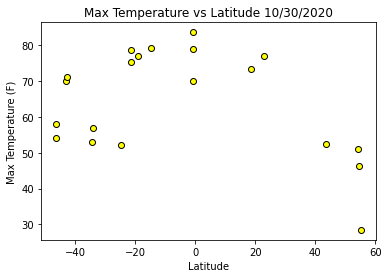

This scatterplot is showing a clear correlation between latitude and tempurature, with temps being the highest near 0 Lat, and getting cooler the further away from 0 it gets in either direction.


In [15]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Max Temp'], color='yellow', edgecolors='black')
plt.title(f'Max Temperature vs Latitude {date}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')


plt.show()
print('This scatterplot is showing a clear correlation between latitude and tempurature, with temps being the highest near 0 Lat, and getting cooler the further away from 0 it gets in either direction.')

## Latitude vs. Humidity Plot

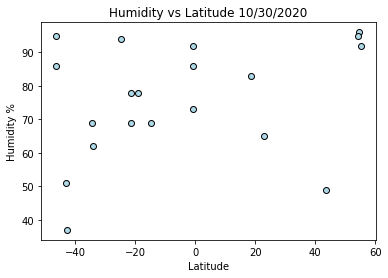

There does not seem to be a strong correlation between latitude and humidity. The only correlation one might retrieve from this data is that the equator generally has a higher humidity.


In [16]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Humidity'], color='lightblue', edgecolors='black')
plt.title(f'Humidity vs Latitude {date}')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')


plt.show()
print('There does not seem to be a strong correlation between latitude and humidity. The only correlation one might retrieve from this data is that the equator generally has a higher humidity.')

## Latitude vs. Cloudiness Plot

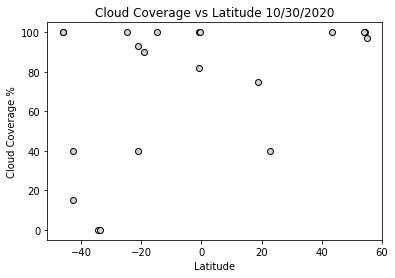

There does not appear to be any correlation at all between latitude and cloud coverage. The full range of cloud coverage appears across most latitudes.


In [17]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Cloudiness'], color='lightgrey', edgecolors='black')
plt.title(f'Cloud Coverage vs Latitude {date}')
plt.ylabel('Cloud Coverage %')
plt.xlabel('Latitude')


plt.show()
print('There does not appear to be any correlation at all between latitude and cloud coverage. The full range of cloud coverage appears across most latitudes.')

## Latitude vs. Wind Speed Plot

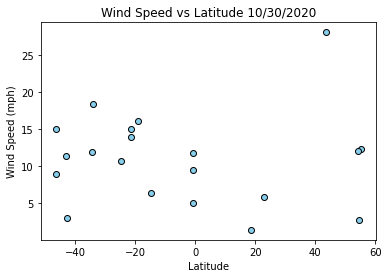

There does not seem to be a strong correlation between latitude and humidity, since the full range of humidity appears across most latitudes.


In [18]:
date = pd.to_datetime('today').date()
date = date.strftime('%m/%d/%Y')

plt.scatter(x=weatherdf['Lat'], y=weatherdf['Wind Speed'], color='skyblue', edgecolors='black')
plt.title(f'Wind Speed vs Latitude {date}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')


plt.show()
print('There does not seem to be a strong correlation between latitude and humidity, since the full range of humidity appears across most latitudes.')

## Linear Regression

In [19]:
southlat = weatherdf.loc[weatherdf['Lat'] < 0]
northlat = weatherdf.loc[weatherdf['Lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

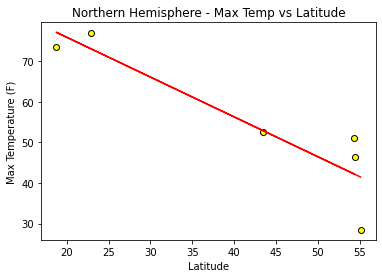

In [28]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Max Temp'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Max Temp'], color='yellow', edgecolors='black')
plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

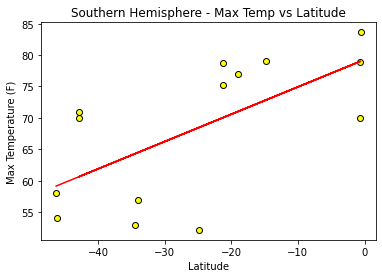

In [29]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Max Temp'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Max Temp'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

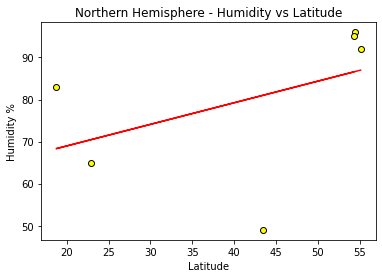

In [33]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Humidity'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Humidity'], color='yellow', edgecolors='black')
plt.title('Northern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

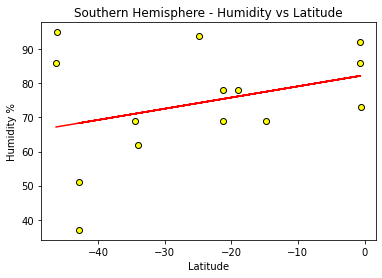

In [30]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Humidity'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Humidity'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

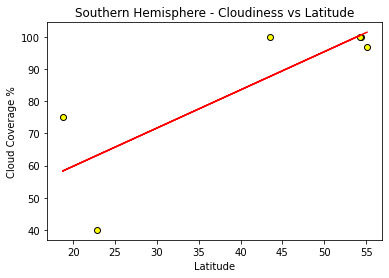

In [34]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Cloudiness'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Cloudiness'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

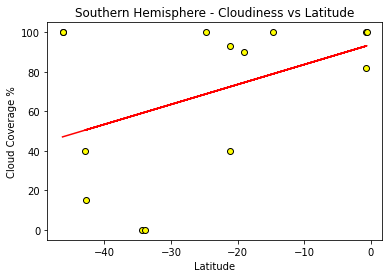

In [31]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Cloudiness'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Cloudiness'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

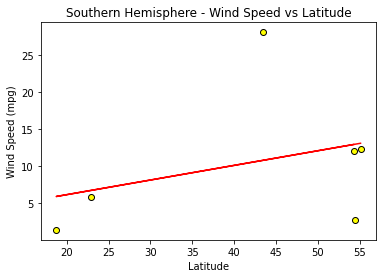

In [35]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northlat['Lat'], northlat['Wind Speed'])
regress_values = northlat['Lat'] * slope + intercept
plt.plot(northlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=northlat['Lat'], y=northlat['Wind Speed'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mpg)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

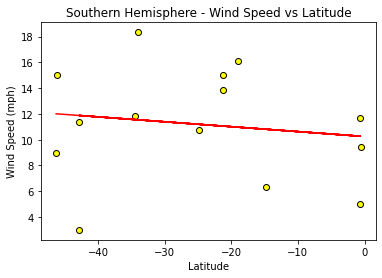

In [32]:
# regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southlat['Lat'], southlat['Wind Speed'])
regress_values = southlat['Lat'] * slope + intercept
plt.plot(southlat['Lat'],regress_values,"r-")

# scatterplot
plt.scatter(x=southlat['Lat'], y=southlat['Wind Speed'], color='yellow', edgecolors='black')
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()